 <a id='intro'></a>
## Introduction

The movie "Moneyball" is a based on creating a baseball team who's main attribute is players that get on base. If players get to the base, they already have a better chance of scoring and winning. Using the *Soccer Database* from Kaggle, I'll review the 10 ten teams from 2009/2010 season, 2015/2016 season, and the most improved teams over time then comparing their Team Attributes to see if theres a similar attributed for winning. 

To do this, I will be loading the Team, Team Attributes, and Match files. I'll merge to the Match files the Team Long Names for both home and away teams to determine the wins. I'll merge the win data to the Team file for a stats record for seasons 2009/2010, 2010/2011, 2011/2012, 2012/2013, 2013/2014, 2014/2015, and 2015/2016. Using the Wins record for 2009/2010 and 2015/2016, I'll also add ranks.  The Ranks with "1" will then be removed as they had 0 wins for the season. Since these teams had no wins in either 2009/2010 or 2015/2016 seasons, it will skew which teams actually improved/changed over the seasons vs just started with the leagues.
 


>`1.` Who are the top 10 teams of 2009/2010?

>`2.` Who are the top 10 teams of 2015/2016?

>`3.` Who are the 10 most improved teams from 2009/2010 to 2015/2016?

>`4.` Finally, I'll review the Team attributes for each group.

In [1]:
import pandas as pd
import numpy as np
import seaborn as snb
import matplotlib.pyplot as plt


Tm=pd.read_csv('Team.csv')
Ma=pd.read_csv('Match.csv')
TA=pd.read_csv('Team_Attributes.csv')

In [2]:
Tm.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [3]:
Ma.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [4]:
TA.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


<a id='wrangling'></a>
## Data Wrangling

><font color="blue">  **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.</font>

### General Properties

In [5]:
Tm.shape

(299, 5)

In [6]:
Tm.columns.tolist()

['id', 'team_api_id', 'team_fifa_api_id', 'team_long_name', 'team_short_name']

> <font color="blue">  For my analysis, I'm only interested in the Team Names, which are linked to other dataframes by api_id. Therefore, I'm dropping the other columns. </font>

In [7]:
Tm.duplicated().sum()

0

In [8]:
Tm.duplicated('team_api_id').sum()

0

In [9]:
Tm.duplicated('team_long_name').sum()

3

In [10]:
Tm[Tm.team_long_name.duplicated(keep=False)]

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
15,16,9996,111560.0,Royal Excel Mouscron,MOU
24,2510,274581,111560.0,Royal Excel Mouscron,MOP
182,31444,8031,111429.0,Polonia Bytom,POB
183,31445,8020,111429.0,Polonia Bytom,GOR
189,31451,8244,301.0,Widzew Łódź,LOD
199,32409,8024,301.0,Widzew Łódź,WID


><font color="blue">   hmmm.  Multiple Team IDs identify the same team name... </font>

<font size="4" color="blue">  Going forward, I'm going to use the team_api_id to pull in the team name. After the team name has been merged, I'll do statistical & graph reviews based on the team name.  I suspect the duplicates are caused by the variation of players & player attributes.  Since I'm not going to be going that far in depth with my analysis, I feel proceeding based on team name will suffice to compare data. </font>

In [11]:
Tm = Tm.drop(columns=['id', 'team_fifa_api_id', 'team_short_name'])
Tm.head()                

,team_api_id,team_long_name
0,9987,KRC Genk
1,9993,Beerschot AC
2,10000,SV Zulte-Waregem
3,9994,Sporting Lokeren
4,9984,KSV Cercle Brugge


In [12]:
Ma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


In [13]:
Ma.columns.tolist()

['id',
 'country_id',
 'league_id',
 'season',
 'stage',
 'date',
 'match_api_id',
 'home_team_api_id',
 'away_team_api_id',
 'home_team_goal',
 'away_team_goal',
 'home_player_X1',
 'home_player_X2',
 'home_player_X3',
 'home_player_X4',
 'home_player_X5',
 'home_player_X6',
 'home_player_X7',
 'home_player_X8',
 'home_player_X9',
 'home_player_X10',
 'home_player_X11',
 'away_player_X1',
 'away_player_X2',
 'away_player_X3',
 'away_player_X4',
 'away_player_X5',
 'away_player_X6',
 'away_player_X7',
 'away_player_X8',
 'away_player_X9',
 'away_player_X10',
 'away_player_X11',
 'home_player_Y1',
 'home_player_Y2',
 'home_player_Y3',
 'home_player_Y4',
 'home_player_Y5',
 'home_player_Y6',
 'home_player_Y7',
 'home_player_Y8',
 'home_player_Y9',
 'home_player_Y10',
 'home_player_Y11',
 'away_player_Y1',
 'away_player_Y2',
 'away_player_Y3',
 'away_player_Y4',
 'away_player_Y5',
 'away_player_Y6',
 'away_player_Y7',
 'away_player_Y8',
 'away_player_Y9',
 'away_player_Y10',
 'away_player

In [14]:
Ma.duplicated().sum()

0

In [15]:
Ma.duplicated('match_api_id').sum()

0

In [16]:
Ma.isnull().sum()

id                0
country_id        0
league_id         0
season            0
stage             0
              ...  
GBD           11817
GBA           11817
BSH           11818
BSD           11818
BSA           11818
Length: 115, dtype: int64

<font size="4" color="blue"> I'm not going to use player information or the information in the 'xyz' columns, which,  based on google searches, are beneficial for betting odds. Since I'll be inquring on wins and overall team improvements, I'm going to drop these columns. </font>

In [17]:
Ma=Ma.drop(columns=['home_player_X1',
 'home_player_X2',
 'home_player_X3',
 'home_player_X4',
 'home_player_X5',
 'home_player_X6',
 'home_player_X7',
 'home_player_X8',
 'home_player_X9',
 'home_player_X10',
 'home_player_X11',
 'away_player_X1',
 'away_player_X2',
 'away_player_X3',
 'away_player_X4',
 'away_player_X5',
 'away_player_X6',
 'away_player_X7',
 'away_player_X8',
 'away_player_X9',
 'away_player_X10',
 'away_player_X11',
 'home_player_Y1',
 'home_player_Y2',
 'home_player_Y3',
 'home_player_Y4',
 'home_player_Y5',
 'home_player_Y6',
 'home_player_Y7',
 'home_player_Y8',
 'home_player_Y9',
 'home_player_Y10',
 'home_player_Y11',
 'away_player_Y1',
 'away_player_Y2',
 'away_player_Y3',
 'away_player_Y4',
 'away_player_Y5',
 'away_player_Y6',
 'away_player_Y7',
 'away_player_Y8',
 'away_player_Y9',
 'away_player_Y10',
 'away_player_Y11',
 'home_player_1',
 'home_player_2',
 'home_player_3',
 'home_player_4',
 'home_player_5',
 'home_player_6',
 'home_player_7',
 'home_player_8',
 'home_player_9',
 'home_player_10',
 'home_player_11',
 'away_player_1',
 'away_player_2',
 'away_player_3',
 'away_player_4',
 'away_player_5',
 'away_player_6',
 'away_player_7',
 'away_player_8',
 'away_player_9',
 'away_player_10',
 'away_player_11',
 'goal',
 'shoton',
 'shotoff',
 'foulcommit',
 'card',
 'cross',
 'corner',
 'possession',
 'B365H',
 'B365D',
 'B365A',
 'BWH',
 'BWD',
 'BWA',
 'IWH',
 'IWD',
 'IWA',
 'LBH',
 'LBD',
 'LBA',
 'PSH',
 'PSD',
 'PSA',
 'WHH',
 'WHD',
 'WHA',
 'SJH',
 'SJD',
 'SJA',
 'VCH',
 'VCD',
 'VCA',
 'GBH',
 'GBD',
 'GBA',
 'BSH',
 'BSD',
 'BSA'])
Ma.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3


In [18]:
TA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

> <font color="blue"> I'm going to drop any column with object and keep those with scores (int & floats).  Since I need the date, I'll convert that to an integer column first. </font>

In [19]:
TA['date']=TA['date'].str[:4].astype(int)

In [20]:
TA = TA.select_dtypes(include = [int, float])
TA = TA.drop(columns='team_fifa_api_id')  # This seems like an extra column... drop it.
TA. head()     

,id,team_api_id,date,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
0,1,9930,2010,60,NaN,50,60,65,55,50,55,45
1,2,9930,2014,52,48.0,56,54,63,64,47,44,54
2,3,9930,2015,47,41.0,54,54,63,64,47,44,54
3,4,8485,2010,70,NaN,70,70,70,70,60,70,70
4,5,8485,2011,47,NaN,52,53,48,52,47,47,52


In [21]:
TA.date.unique()

array([2010, 2014, 2015, 2011, 2012, 2013])

><font color="blue">  In looking through the TA file, I realized there isn't any season data for 2008/2009.  Therefore, I'm going to drop that season from the Match file. </font>

In [22]:
Ma=Ma.query('season != "2008/2009"')
Ma.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
306,307,1,1,2009/2010,1,2009-07-31 00:00:00,665318,9985,9997,2,2
307,308,1,1,2009/2010,1,2009-08-02 00:00:00,665320,9986,8342,1,2
308,309,1,1,2009/2010,1,2009-08-02 00:00:00,665321,9984,9991,1,3
309,310,1,1,2009/2010,1,2009-08-01 00:00:00,665322,9994,10000,1,1
310,311,1,1,2009/2010,1,2009-08-01 00:00:00,665323,8571,8635,0,2


<font size="4" color="blue"> The below function will add 3 columns to the end of my Ma (Match) dataframe. The columns will identify who won the game (home or away team, or tie if applicable), and will add each team's name. </font>

> <font color="blue"> The ".to_string(index=False)" will remove the ID and .info() junk, so only the team name will remain. </font>

In [23]:
def results(row):  #the following to assign variables based on the array passed.
    home_score = row[0]
    away_score = row[1]
    home_team_api_id = row[2]
    away_team_api_id = row[3]

    # Let's just query both right away.
    home_team_name = Tm.query('team_api_id == {}'.format(home_team_api_id))['team_long_name']
    away_team_name = Tm.query('team_api_id == {}'.format(away_team_api_id))['team_long_name']    
    if home_score > away_score: #WHO WON!?!?!  and add the Team location based on this detail, along with adding both team names.
        return pd.Series(['Home', home_team_name.to_string(index=False), away_team_name.to_string(index=False)])
    elif home_score < away_score:
        return pd.Series(['Away', home_team_name.to_string(index=False), away_team_name.to_string(index=False)])
    else:
        return pd.Series(['Tie', home_team_name.to_string(index=False), away_team_name.to_string(index=False)])

Ma[['winning_team', 'home_team_name', 'away_team_name']] = Ma[['home_team_goal', 'away_team_goal', 'home_team_api_id', 'away_team_api_id']].apply(results, axis=1)


In [24]:
Ma.head() 

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,winning_team,home_team_name,away_team_name
306,307,1,1,2009/2010,1,2009-07-31 00:00:00,665318,9985,9997,2,2,Tie,Standard de Liège,Sint-Truidense VV
307,308,1,1,2009/2010,1,2009-08-02 00:00:00,665320,9986,8342,1,2,Away,Sporting Charleroi,Club Brugge KV
308,309,1,1,2009/2010,1,2009-08-02 00:00:00,665321,9984,9991,1,3,Away,KSV Cercle Brugge,KAA Gent
309,310,1,1,2009/2010,1,2009-08-01 00:00:00,665322,9994,10000,1,1,Tie,Sporting Lokeren,SV Zulte-Waregem
310,311,1,1,2009/2010,1,2009-08-01 00:00:00,665323,8571,8635,0,2,Away,KV Kortrijk,RSC Anderlecht


<font size="4" color="blue"> To ensure I don't accidentally query by team_api_id going forward and only by team name, I'm going to drop those columns. Plus, I won't need the ID columns for match, season, ect. Drop 'em all! </font>

In [25]:
delCol = Ma.columns.tolist()
delCol = [val for val in delCol if val.endswith("_id")]
delCol
Ma=Ma.drop(columns= delCol)
Ma.head()

,id,season,stage,date,home_team_goal,away_team_goal,winning_team,home_team_name,away_team_name
306,307,2009/2010,1,2009-07-31 00:00:00,2,2,Tie,Standard de Liège,Sint-Truidense VV
307,308,2009/2010,1,2009-08-02 00:00:00,1,2,Away,Sporting Charleroi,Club Brugge KV
308,309,2009/2010,1,2009-08-02 00:00:00,1,3,Away,KSV Cercle Brugge,KAA Gent
309,310,2009/2010,1,2009-08-01 00:00:00,1,1,Tie,Sporting Lokeren,SV Zulte-Waregem
310,311,2009/2010,1,2009-08-01 00:00:00,0,2,Away,KV Kortrijk,RSC Anderlecht


In [26]:
Tm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   team_api_id     299 non-null    int64 
 1   team_long_name  299 non-null    object
dtypes: int64(1), object(1)
memory usage: 4.8+ KB


> <font color="blue"> Let's add the Win-Loss-Tie stats for each season to the end of the Team(Tm) dataframe </font>

In [27]:
# When I started writing this, I wasn't sure if I'd utilize the Lost or Tied columns.
# I assumed if I was going through the process for Wins, I might as well do all 3.
team_list = Tm.team_long_name.tolist()  #Create team list
Seasons = Ma.season.unique().tolist() #Create season list
i=0

for i, x in enumerate(Seasons): #loop through the season list
    j=0
    dataW = []
    dataL = []
    dataT = []
    current = Ma.query("season == @x")
    for j, t in enumerate(team_list): #loop through the team list -- per season
        wins=0
        loses=0
        ties=0      
        winnerH = current.query('home_team_name == "{}"'.format(t))['winning_team']
        try:
            wins = winnerH.value_counts()["Home"]
        except KeyError:
            wins = wins
            
        try:
            loses = winnerH.value_counts()["Away"]
        except KeyError:
            loses = loses
            
        try:
            ties = winnerH.value_counts()["Tie"]
        except KeyError:
            ties = ties
            
#if you are away and away team wins, you won!
        winnerA = current.query('away_team_name == "{}"'.format(t))['winning_team']
        try:
            wins = wins + winnerA.value_counts()["Away"]
        except KeyError:
            wins = wins
            
        try:
            loses = loses + winnerA.value_counts()["Home"]
        except KeyError:
            loses = loses
            
        try:
            ties = ties + winnerA.value_counts()["Tie"]
        except KeyError:
            ties = ties
            
        j+=1
        dataW.append(wins)  #Create lists for each stat for the whole team list
        dataL.append(loses)
        dataT.append(ties)
    
    i+=1
    x = x.replace("/", "F")  #Add columns to the Team dataframe for each season's win, lost, tied numbers
    colW = "S" + x + "_Wins"
    colL = "S" + x + "_Loses"
    colT = "S" + x + "_Ties"
    colR = "S" + x + "_Rank"
    Tm[colW] = dataW 
    Tm[colR] = Tm[colW].rank(method='min').astype(int) # After reviewing graphs, I thought this information would be interesting to see
    Tm[colL] = dataL                    # Adding the Rank information to this function seemed most efficent for code & Processing
    Tm[colT] = dataT
        
Tm.head()

,team_api_id,team_long_name,S2009F2010_Wins,S2009F2010_Rank,S2009F2010_Loses,S2009F2010_Ties,S2010F2011_Wins,S2010F2011_Rank,S2010F2011_Loses,S2010F2011_Ties,...,S2013F2014_Loses,S2013F2014_Ties,S2014F2015_Wins,S2014F2015_Rank,S2014F2015_Loses,S2014F2015_Ties,S2015F2016_Wins,S2015F2016_Rank,S2015F2016_Loses,S2015F2016_Ties
0,9987,KRC Genk,8,143,10,10,19,270,4,7,...,0,0,13,215,7,10,14,228,10,6
1,9993,Beerschot AC,9,158,11,8,5,117,14,11,...,0,0,0,1,0,0,0,1,0,0
2,10000,SV Zulte-Waregem,10,175,7,11,7,126,11,12,...,0,0,8,138,15,7,12,200,11,7
3,9994,Sporting Lokeren,5,116,20,3,13,216,6,11,...,0,0,10,161,8,12,8,129,12,10
4,9984,KSV Cercle Brugge,11,187,12,5,11,169,13,6,...,0,0,6,117,18,6,0,1,0,0


<font size="4" color="blue"> To see how teams have improved over the seasons, I will remove any team that has 0 wins, loses, and ties for either 2009/2010 or 2015/2016 seasons. </font>

In [28]:
Tm=Tm.drop(Tm[Tm.S2009F2010_Rank==1].index)
Tm.describe()

,team_api_id,S2009F2010_Wins,S2009F2010_Rank,S2009F2010_Loses,S2009F2010_Ties,S2010F2011_Wins,S2010F2011_Rank,S2010F2011_Loses,S2010F2011_Ties,S2011F2012_Wins,...,S2013F2014_Loses,S2013F2014_Ties,S2014F2015_Wins,S2014F2015_Rank,S2014F2015_Loses,S2014F2015_Ties,S2015F2016_Wins,S2015F2016_Rank,S2015F2016_Loses,S2015F2016_Ties
count,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,...,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000
mean,8942.344086,13.037634,201.709677,13.048387,8.806452,11.935484,180.311828,11.150538,7.903226,11.177419,...,8.870968,6.000000,10.430108,153.913978,8.526882,6.569892,9.978495,147.908602,8.365591,6.182796
std,1567.548215,5.818301,55.138858,5.401984,2.842755,6.655713,84.940040,6.272111,4.272007,7.376055,...,7.306755,4.505852,8.091902,105.490018,6.801576,4.718905,8.280852,107.659911,6.826475,4.816517
min,1601.000000,4.000000,114.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,8525.750000,9.000000,158.000000,9.000000,7.000000,9.000000,143.000000,7.250000,6.000000,7.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,8709.000000,12.000000,203.000000,13.000000,9.000000,12.000000,193.000000,12.000000,8.000000,11.000000,...,10.000000,7.000000,11.000000,173.000000,9.000000,8.000000,10.000000,162.000000,10.000000,7.000000
75%,9921.500000,16.750000,251.500000,17.000000,11.000000,16.750000,252.250000,15.750000,11.000000,15.750000,...,15.000000,9.000000,16.000000,245.000000,14.000000,10.000000,15.000000,243.000000,13.750000,9.750000
max,10281.000000,31.000000,298.000000,29.000000,16.000000,30.000000,298.000000,26.000000,19.000000,32.000000,...,25.000000,18.000000,30.000000,298.000000,26.000000,17.000000,30.000000,299.000000,27.000000,18.000000


In [29]:
Tm=Tm.drop(Tm[Tm.S2015F2016_Rank==1].index)
Tm.describe()

,team_api_id,S2009F2010_Wins,S2009F2010_Rank,S2009F2010_Loses,S2009F2010_Ties,S2010F2011_Wins,S2010F2011_Rank,S2010F2011_Loses,S2010F2011_Ties,S2011F2012_Wins,...,S2013F2014_Loses,S2013F2014_Ties,S2014F2015_Wins,S2014F2015_Rank,S2014F2015_Loses,S2014F2015_Ties,S2015F2016_Wins,S2015F2016_Rank,S2015F2016_Loses,S2015F2016_Ties
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,...,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,9053.153846,14.484615,216.507692,11.376923,8.676923,14.107692,210.184615,11.530769,8.530769,13.415385,...,9.969231,7.238462,14.261538,208.069231,10.384615,8.569231,14.276923,211.192308,11.969231,8.846154
std,1512.487219,5.906552,53.001718,4.785743,2.877917,5.646219,64.590035,5.243214,3.430796,6.771789,...,6.085869,3.841438,6.397133,70.384458,5.044584,3.452756,6.041222,56.722102,4.833569,3.086509
min,1601.000000,4.000000,114.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000,110.000000,2.000000,1.000000
25%,8533.500000,10.000000,175.000000,8.000000,7.000000,11.000000,169.000000,8.000000,6.000000,10.000000,...,6.000000,6.000000,11.000000,173.000000,7.000000,7.000000,10.000000,162.000000,9.250000,7.000000
50%,9778.000000,13.000000,216.000000,11.000000,9.000000,13.000000,216.000000,12.000000,8.000000,13.000000,...,11.000000,8.000000,13.000000,215.000000,11.000000,9.000000,13.000000,218.000000,12.000000,9.000000
75%,9952.250000,18.750000,264.000000,15.000000,11.000000,18.000000,264.000000,14.750000,11.000000,17.000000,...,14.750000,9.000000,18.000000,264.000000,14.000000,10.000000,17.750000,263.250000,15.000000,10.000000
max,10269.000000,31.000000,298.000000,25.000000,16.000000,30.000000,298.000000,26.000000,17.000000,32.000000,...,22.000000,18.000000,30.000000,298.000000,22.000000,17.000000,30.000000,299.000000,27.000000,18.000000


<font size="4" color="blue"> Remember, I'm going to reference everything based on team name, so that needs to be added to the Team Attributes (TA). </font>

In [30]:
def teamName(d):  #the following to assign variables based on the array passed.
    team_api_id = d
    
    # Let's just query both right away.
    team_long_name = Tm.query('team_api_id == {}'.format(team_api_id))['team_long_name']
    return team_long_name.to_string(index=False)

TA['team_long_name'] = TA['team_api_id'].apply(teamName)
TA.head()

,id,team_api_id,date,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,team_long_name
0,1,9930,2010,60,NaN,50,60,65,55,50,55,45,"Series([], )"
1,2,9930,2014,52,48.0,56,54,63,64,47,44,54,"Series([], )"
2,3,9930,2015,47,41.0,54,54,63,64,47,44,54,"Series([], )"
3,4,8485,2010,70,NaN,70,70,70,70,60,70,70,Aberdeen
4,5,8485,2011,47,NaN,52,53,48,52,47,47,52,Aberdeen


In [31]:
TA.sort_values(by=['team_long_name', 'date'])

,id,team_api_id,date,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,team_long_name
419,420,8722,2010,55,NaN,65,65,40,60,45,55,70,1. FC Köln
420,421,8722,2011,58,NaN,71,42,39,50,40,40,56,1. FC Köln
421,422,8722,2012,53,NaN,53,57,44,57,43,55,67,1. FC Köln
422,423,8722,2013,60,NaN,56,57,44,57,43,55,67,1. FC Köln
423,424,8722,2014,59,53.0,57,53,47,59,57,46,54,1. FC Köln
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1169,1170,8025,2011,47,NaN,55,45,48,54,48,47,51,Śląsk Wrocław
1170,1171,8025,2012,65,NaN,63,67,31,67,24,24,39,Śląsk Wrocław
1171,1172,8025,2013,65,NaN,50,67,31,67,30,30,40,Śląsk Wrocław
1172,1173,8025,2014,47,53.0,34,38,36,68,37,37,39,Śląsk Wrocław


In [32]:
TA.shape

(1458, 13)

In [33]:
WinCols = Tm.columns.tolist()
WinCols = [val for val in WinCols if val.endswith("_Wins")]


['S2009F2010_Wins',
 'S2010F2011_Wins',
 'S2011F2012_Wins',
 'S2012F2013_Wins',
 'S2013F2014_Wins',
 'S2014F2015_Wins',
 'S2015F2016_Wins']

In [34]:
top09 = Tm.sort_values(by=['S2009F2010_Wins'], ascending=False).head(10)[['team_long_name',
 'S2009F2010_Wins',
 'S2010F2011_Wins',
 'S2011F2012_Wins',
 'S2012F2013_Wins',
 'S2013F2014_Wins',
 'S2014F2015_Wins',
 'S2015F2016_Wins','S2009F2010_Rank','S2015F2016_Rank']]

In [35]:
top15 = Tm.sort_values(by=['S2015F2016_Wins'], ascending=False).head(10)[['team_long_name',
 'S2009F2010_Wins',
 'S2010F2011_Wins',
 'S2011F2012_Wins',
 'S2012F2013_Wins',
 'S2013F2014_Wins',
 'S2014F2015_Wins',
 'S2015F2016_Wins', 'S2009F2010_Rank','S2015F2016_Rank']]

In [36]:
Tm['mostImp']=Tm.S2015F2016_Rank-Tm.S2009F2010_Rank

In [37]:
Top5 = Tm.sort_values(by=['mostImp'], ascending=False).head(10)[['team_long_name',
 'S2009F2010_Wins',
 'S2010F2011_Wins',
 'S2011F2012_Wins',
 'S2012F2013_Wins',
 'S2013F2014_Wins',
 'S2014F2015_Wins',
 'S2015F2016_Wins', 'S2009F2010_Rank','S2015F2016_Rank']]

# Exploratory Data Analysis
>Let's answer some questions

> ## `1.` Who were the top 10 teams of 2009/2010 season?


In [38]:
top09

,team_long_name,S2009F2010_Wins,S2010F2011_Wins,S2011F2012_Wins,S2012F2013_Wins,S2013F2014_Wins,S2014F2015_Wins,S2015F2016_Wins,S2009F2010_Rank,S2015F2016_Rank
256,Real Madrid CF,31,29,32,26,27,30,28,298,293
258,FC Barcelona,31,30,28,32,27,30,29,298,296
159,FC Twente,27,21,17,17,17,13,12,294,200
43,Chelsea,27,21,18,22,25,26,12,294,200
161,Ajax,27,22,23,22,20,21,25,294,287
25,Manchester United,27,23,28,28,19,20,19,294,273
287,FC Basel,25,21,22,21,19,24,26,290,289
242,Celtic,25,29,30,24,31,29,26,290,289
286,BSC Young Boys,25,15,13,11,17,19,20,290,278
139,Inter,24,23,17,16,15,14,20,287,278


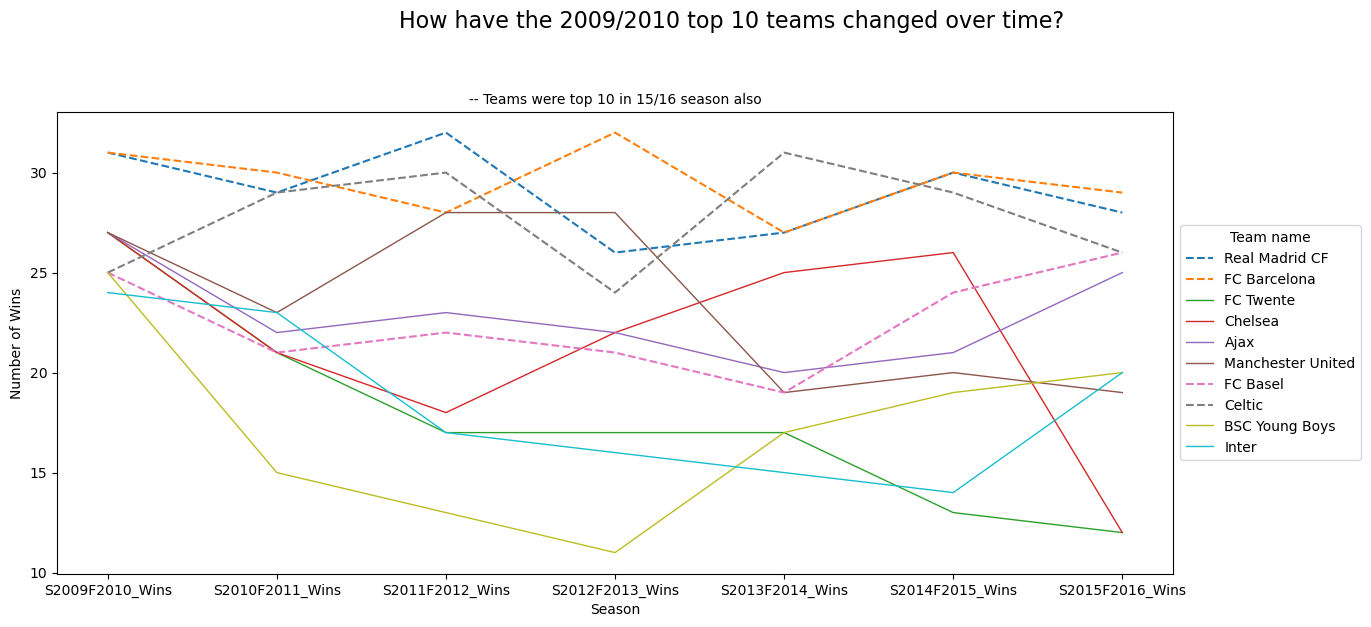

In [42]:
fig=plt.figure(figsize=[18,6])
ax=plt.subplot(111)

i=0 #Top teams of 2009-2010!
z=top09.team_long_name.count()
while i <z:
    name = top09.values[i, 0]
    linesize = 1
    style = 'solid'
    stat09 = top09.values[i, 8]
    stat15 = top09.values[i, 9]
    if name in top15['team_long_name'].values:
        linesize = 1.5
        style='dashed'
    ax.plot(WinCols, top09.values[i, 1:8], label=name, linestyle = style, linewidth = linesize)
    i+=1


plt.ylabel('Number of Wins')
plt.xlabel('Season')
plt.suptitle('How have the 2009/2010 top 10 teams changed over time?', y=1.05, fontsize=16)
plt.title('-- Teams were top 10 in 15/16 season also', fontsize=10)
labels = WinCols

box=ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
legend.set_title("Team name");



<font size="3" color="blue"> This graph shows the overall change in wins for the 2009/2010 top 10 teams to the 2015/2016 season. Ream Madrid CF, FC Barcelona, FC Basel, and Celtic keep a strong hold to the top 10.  However, it's interesting to see how much the others fall over the seasons. </font>

> ## `2.` Who were the top 10 teams of 2015/2016 season?

In [43]:
top15

,team_long_name,S2009F2010_Wins,S2010F2011_Wins,S2011F2012_Wins,S2012F2013_Wins,S2013F2014_Wins,S2014F2015_Wins,S2015F2016_Wins,S2009F2010_Rank,S2015F2016_Rank
70,Paris Saint-Germain,12,15,23,25,27,24,30,203,299
216,SL Benfica,24,20,21,24,23,27,29,287,296
133,Juventus,16,15,22,27,33,26,29,247,296
258,FC Barcelona,31,30,28,32,27,30,29,298,296
269,Atlético Madrid,13,17,15,23,28,23,28,216,293
256,Real Madrid CF,31,29,32,26,27,30,28,298,293
94,FC Bayern Munich,20,19,23,29,29,25,28,272,293
207,Sporting CP,13,13,18,11,20,22,27,216,292
287,FC Basel,25,21,22,21,19,24,26,290,289
242,Celtic,25,29,30,24,31,29,26,290,289


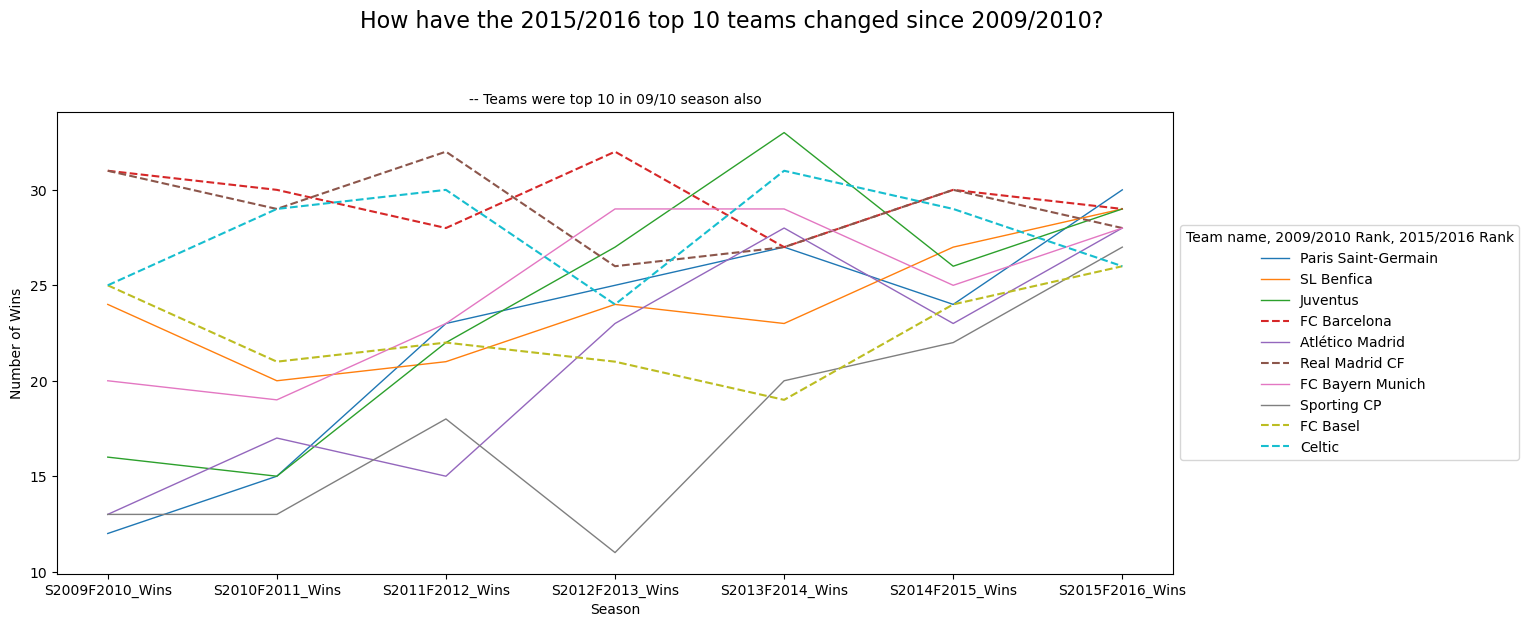

In [41]:
fig=plt.figure(figsize=[18,6])
ax=plt.subplot(111)
i=0 #Top teams of 2015-2016!
z=top15.team_long_name.count()

while i <z:
    name = top15.values[i, 0]
    linesize = 1
    style = 'solid'
    stat09 = top15.values[i, 8]
    stat15 = top15.values[i, 9]
    if name in top09['team_long_name'].values:
        linesize = 1.5
        style='dashed'
    ax.plot(WinCols, top15.values[i, 1:8], label=name, linestyle = style, linewidth = linesize)
    i+=1
    

plt.ylabel('Number of Wins')
plt.xlabel('Season')
plt.suptitle('How have the 2015/2016 top 10 teams changed since 2009/2010?', y=1.05, fontsize=16)
plt.title('-- Teams were top 10 in 09/10 season also', fontsize=10)
labels = WinCols

box=ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
legend.set_title("Team name, 2009/2010 Rank, 2015/2016 Rank");

<font size="3" color="blue"> Reviewing how the 2015/2016 top 10 teams over the seasons. This shows how much some have improved in wins over the seasons.  </font>


> ## `3.` Who were the top 10 most improved teams from 2009/2010 to 2015/2016 season?
These are teams that played both 2009/2010 & 2015/2016 seasons.

In [44]:
Top5

,team_long_name,S2009F2010_Wins,S2010F2011_Wins,S2011F2012_Wins,S2012F2013_Wins,S2013F2014_Wins,S2014F2015_Wins,S2015F2016_Wins,S2009F2010_Rank,S2015F2016_Rank
195,Piast Gliwice,7,0,0,13,8,11,17,130,258
103,Hertha BSC Berlin,5,0,7,0,11,9,14,116,228
31,West Ham United,8,7,0,12,11,12,16,143,252
240,Aberdeen,10,11,9,11,20,23,22,175,282
215,Rio Ave FC,6,10,7,12,8,10,14,124,228
70,Paris Saint-Germain,12,15,23,25,27,24,30,203,299
0,KRC Genk,8,19,13,15,0,13,14,143,228
108,Borussia Mönchengladbach,10,10,17,12,16,19,17,175,258
78,AS Saint-Étienne,10,12,16,16,20,19,17,175,258
64,OGC Nice,11,11,10,18,12,13,18,187,265


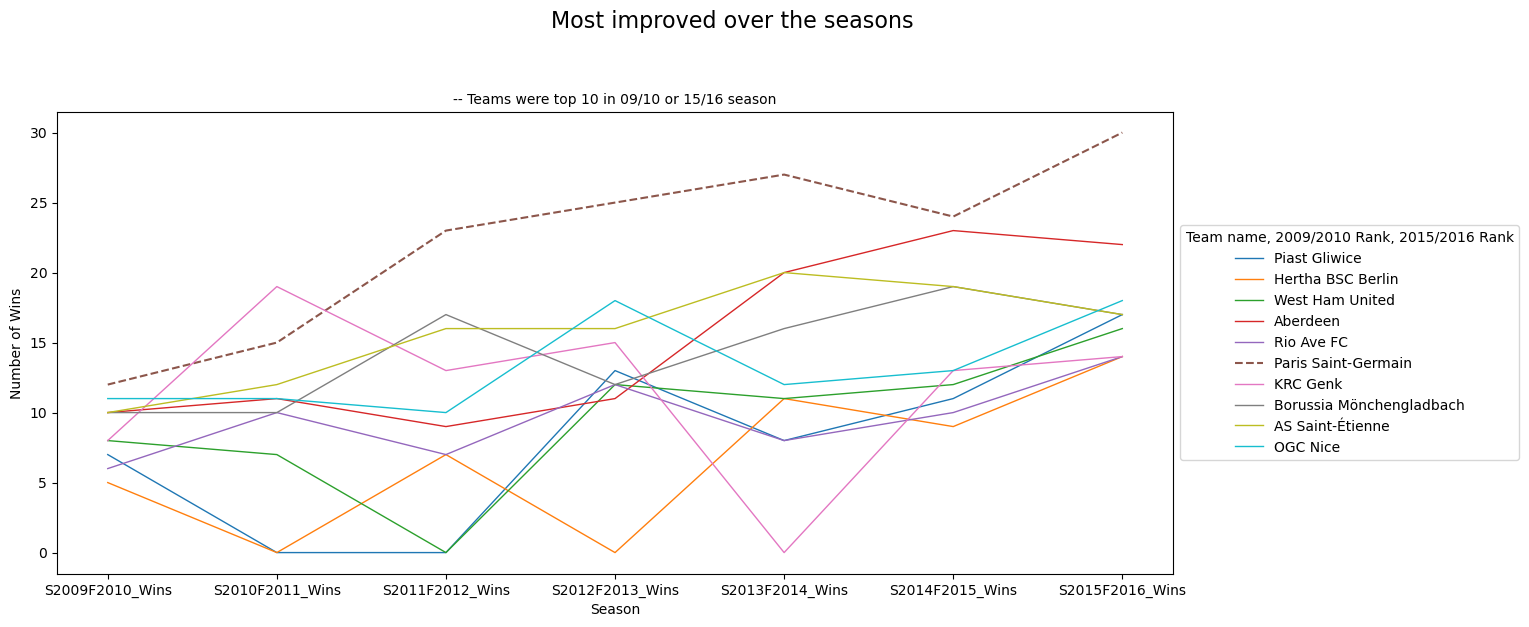

In [46]:
fig=plt.figure(figsize=[18,6])
ax=plt.subplot(111)
i=0 #Top teams of 2015-2016!
z=Top5.team_long_name.count()

while i <z:
    name = Top5.values[i, 0]
    linesize = 1
    style = 'solid'
    stat09 = Top5.values[i, 8]
    stat15 = Top5.values[i, 9]
    name = Top5.values[i, 0]
    if name in top15['team_long_name'].values:
        linesize = 1.5
        style='dashed'
    ax.plot(WinCols, Top5.values[i, 1:8], label=name, linestyle = style, linewidth = linesize)
    i+=1
     
    
plt.ylabel('Number of Wins')
plt.xlabel('Season')
plt.suptitle('Most improved over the seasons', y=1.05, fontsize=16)
plt.title('-- Teams were top 10 in 09/10 or 15/16 season', fontsize=10)
labels = WinCols


box=ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
legend.set_title("Team name, 2009/2010 Rank, 2015/2016 Rank");


<font size="3" color="blue"> This graph shows the overall change in wins for the Most Improved teams from 2009/2010 to 2015/2016. It's interesting to see Paris Saint-Germain improve from 11 to 30 making it a top 10 team of 2015/2016 season. After seeing the vast differences in how the teams did over the last 3 graphs, let's review how their team attributes changed. </font>

> ## `4.` How do the Team attributes compare between all 3 Top 10s?

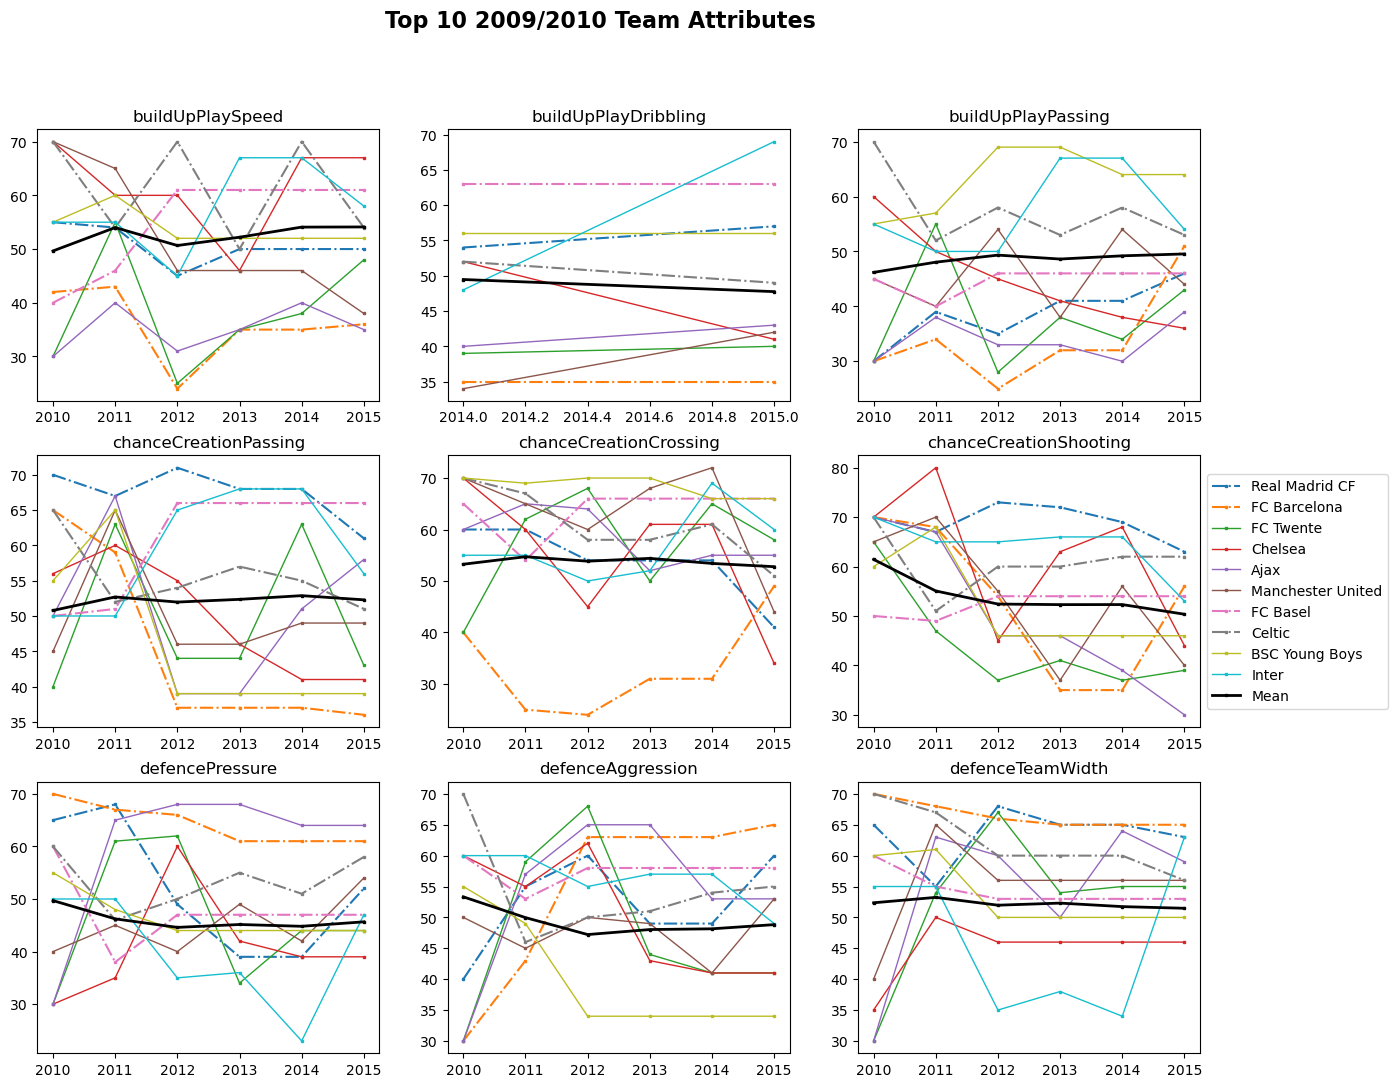

In [47]:
fig=plt.figure(num=None, figsize=(15, 12), facecolor='w', edgecolor='k')
fig.suptitle('Top 10 2009/2010 Team Attributes', fontsize=16, fontweight="bold")
tl=plt.subplot(331, title='buildUpPlaySpeed')
tm=plt.subplot(332, title='buildUpPlayDribbling')
tr=plt.subplot(333, title='buildUpPlayPassing')
ml=plt.subplot(334, title='chanceCreationPassing')
mm=plt.subplot(335, title='chanceCreationCrossing')
mr=plt.subplot(336, title='chanceCreationShooting')
bl=plt.subplot(337, title='defencePressure')
bm=plt.subplot(338, title='defenceAggression')
br=plt.subplot(339, title='defenceTeamWidth')
i=2 

for i, z in enumerate(top09.team_long_name):  #Loops through the team names
    values=TA.query('team_long_name == "{}"'.format(z)).sort_values(by='date') 
    linesize = 1
    style = 'solid'
    if z in top15['team_long_name'].values: #if the 2009/2010 team name was a 2015/2016 season top 10, line style changes
        linesize = 1.5
        style='dashdot'  #Below will graph for each team each Team Attribute value
    tl.plot(values.date, values.buildUpPlaySpeed, label=z, linestyle = style, linewidth = linesize, marker='s', markersize=1.5)
    tm.plot(values.date, values.buildUpPlayDribbling, label=z, linestyle = style, linewidth = linesize, marker='s', markersize=1.5)
    tr.plot(values.date, values.buildUpPlayPassing, label=z, linestyle = style, linewidth = linesize, marker='s', markersize=1.5)
    ml.plot(values.date, values.chanceCreationPassing, label=z, linestyle = style, linewidth = linesize, marker='s', markersize=1.5)
    mm.plot(values.date, values.chanceCreationCrossing, label=z, linestyle = style, linewidth = linesize, marker='s', markersize=1.5)
    mr.plot(values.date, values.chanceCreationShooting, label=z, linestyle = style, linewidth = linesize, marker='s', markersize=1.5)
    bl.plot(values.date, values.defencePressure, label=z, linestyle = style, linewidth = linesize, marker='s', markersize=1.5)
    bm.plot(values.date, values.defenceAggression, label=z,linestyle = style, linewidth = linesize,  marker='s', markersize=1.5)
    br.plot(values.date, values.defenceTeamWidth, label=z, linestyle = style, linewidth = linesize, marker='s', markersize=1.5)   
    i+=1
#Plots average per year on each graph
tl.plot(values.date, TA.groupby('date')['buildUpPlaySpeed'].mean(), color='black', linewidth=2, label="Mean", marker='s', markersize=1.5)
tm.plot(values.date, TA.groupby('date')['buildUpPlayDribbling'].mean(), color='black', linewidth=2, label="Mean", marker='s', markersize=1.5)
tr.plot(values.date, TA.groupby('date')['buildUpPlayPassing'].mean(), color='black', linewidth=2, label="Mean", marker='s', markersize=1.5)
ml.plot(values.date, TA.groupby('date')['chanceCreationPassing'].mean(), color='black', linewidth=2, label="Mean", marker='s', markersize=1.5)
mm.plot(values.date, TA.groupby('date')['chanceCreationCrossing'].mean(), color='black', linewidth=2, label="Mean", marker='s', markersize=1.5)
mr.plot(values.date, TA.groupby('date')['chanceCreationShooting'].mean(), color='black', linewidth=2, label="Mean", marker='s', markersize=1.5)
bl.plot(values.date, TA.groupby('date')['defencePressure'].mean(), color='black', linewidth=2, label="Mean", marker='s', markersize=1.5)
bm.plot(values.date, TA.groupby('date')['defenceAggression'].mean(), color='black', linewidth=2, label="Mean", marker='s', markersize=1.5)
br.plot(values.date, TA.groupby('date')['defenceTeamWidth'].mean(), color='black', linewidth=2, label="Mean", marker='s', markersize=1.5)

box=mr.get_position()
mr.set_position([box.x0, box.y0, box.width, box.height])

legend = mr.legend(loc='center left', bbox_to_anchor=(1, 0.5))
legend.set_title;

<font size="4" color="blue"> Real Madrid, FC Barcelona, FC Basel, and Celtic all maintained top 10 from 2009/2010 seasons to 2015/2016.  Using these Dashdot lines, we can review where the other teams may have lost comparable abilities.  We can also review against each year's avagerage rank (in black). </font>

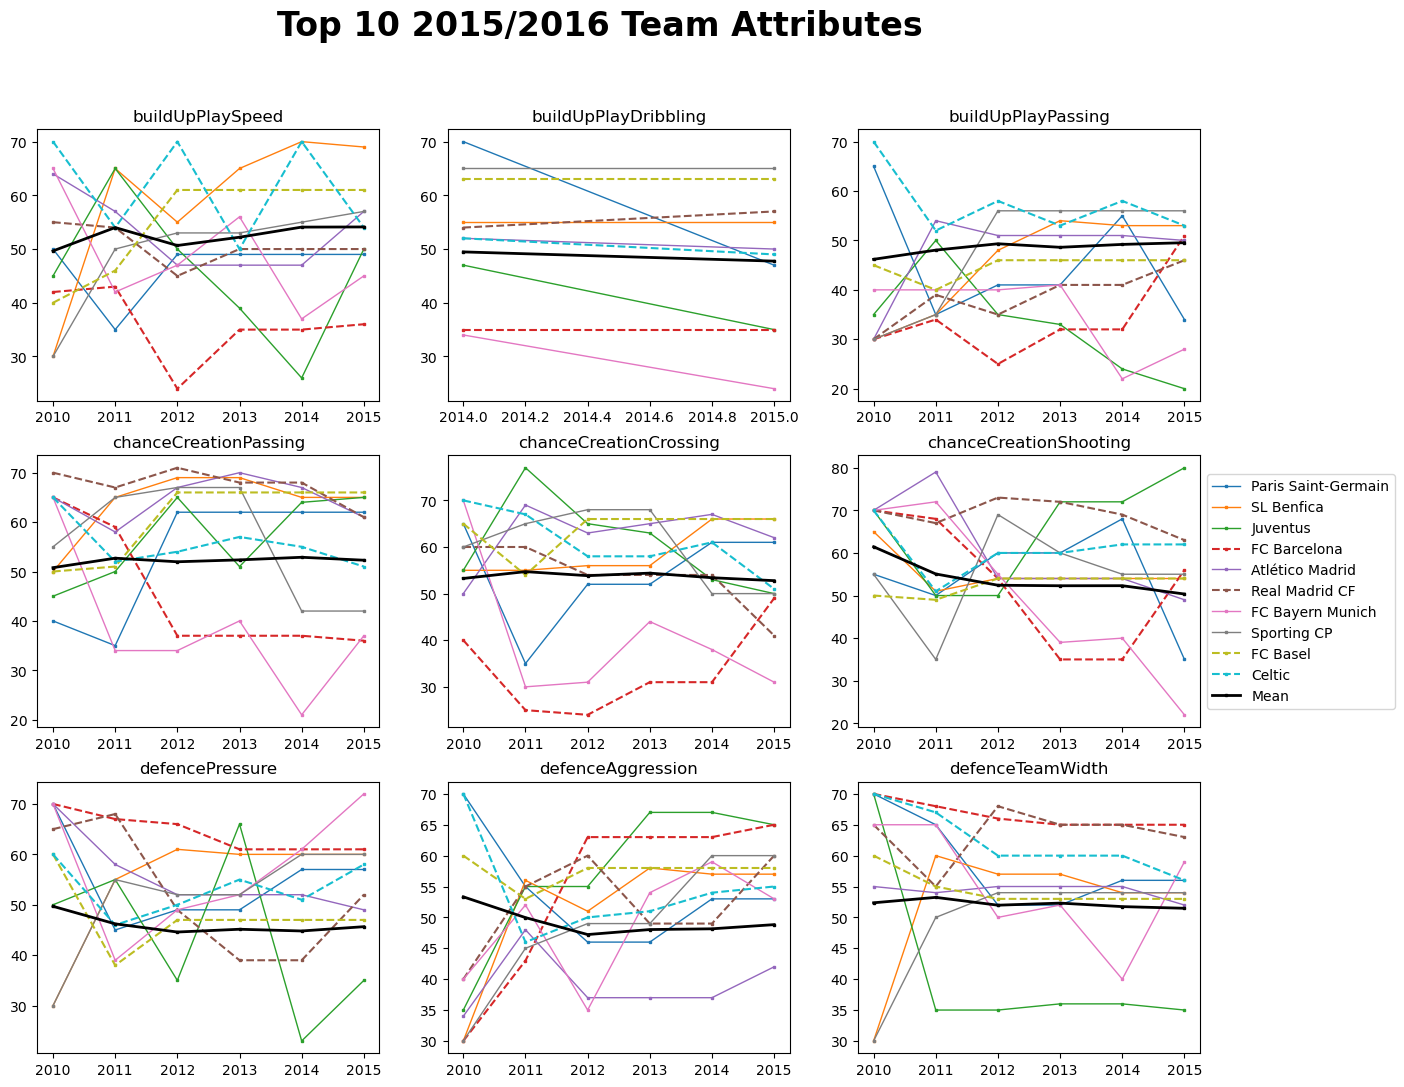

In [48]:
fig=plt.figure(num=None, figsize=(15, 12), facecolor='w', edgecolor='k')
fig.suptitle('Top 10 2015/2016 Team Attributes', fontsize=24, fontweight="bold")
tl=plt.subplot(331, title='buildUpPlaySpeed')
tm=plt.subplot(332, title='buildUpPlayDribbling')
tr=plt.subplot(333, title='buildUpPlayPassing')
ml=plt.subplot(334, title='chanceCreationPassing')
mm=plt.subplot(335, title='chanceCreationCrossing')
mr=plt.subplot(336, title='chanceCreationShooting')
bl=plt.subplot(337, title='defencePressure')
bm=plt.subplot(338, title='defenceAggression')
br=plt.subplot(339, title='defenceTeamWidth')
i=2 

for i, z in enumerate(top15.team_long_name):  
    values=TA.query('team_long_name == "{}"'.format(z)).sort_values(by='date')
    linesize = 1
    style = 'solid'
    if z in top09['team_long_name'].values: #If a 2015/2016 team is a top 10 from 2009/2010, will plot with different linestyle 
        linesize = 1.5
        style='dashed'  #below each Team is ploted on each Team Attribute plot
    tl.plot(values.date, values.buildUpPlaySpeed, label=z, linestyle = style, linewidth = linesize, marker='s', markersize=1.5)
    tm.plot(values.date, values.buildUpPlayDribbling, label=z, linestyle = style, linewidth = linesize, marker='s', markersize=1.5)
    tr.plot(values.date, values.buildUpPlayPassing, label=z, linestyle = style, linewidth = linesize, marker='s', markersize=1.5)
    ml.plot(values.date, values.chanceCreationPassing, label=z, linestyle = style, linewidth = linesize, marker='s', markersize=1.5)
    mm.plot(values.date, values.chanceCreationCrossing, label=z, linestyle = style, linewidth = linesize, marker='s', markersize=1.5)
    mr.plot(values.date, values.chanceCreationShooting, label=z, linestyle = style, linewidth = linesize, marker='s', markersize=1.5)
    bl.plot(values.date, values.defencePressure, label=z, linestyle = style, linewidth = linesize, marker='s', markersize=1.5)
    bm.plot(values.date, values.defenceAggression, label=z, linestyle = style, linewidth = linesize, marker='s', markersize=1.5)
    br.plot(values.date, values.defenceTeamWidth, label=z, linestyle = style, linewidth = linesize, marker='s', markersize=1.5)   
    i+=1
#Average Team attribute line
tl.plot(values.date, TA.groupby('date')['buildUpPlaySpeed'].mean(), color='black', linewidth=2, label="Mean", marker='s', markersize=1.5)
tm.plot(values.date, TA.groupby('date')['buildUpPlayDribbling'].mean(), color='black', linewidth=2, label="Mean", marker='s', markersize=1.5)
tr.plot(values.date, TA.groupby('date')['buildUpPlayPassing'].mean(), color='black', linewidth=2, label="Mean", marker='s', markersize=1.5)
ml.plot(values.date, TA.groupby('date')['chanceCreationPassing'].mean(), color='black', linewidth=2, label="Mean", marker='s', markersize=1.5)
mm.plot(values.date, TA.groupby('date')['chanceCreationCrossing'].mean(), color='black', linewidth=2, label="Mean", marker='s', markersize=1.5)
mr.plot(values.date, TA.groupby('date')['chanceCreationShooting'].mean(), color='black', linewidth=2, label="Mean", marker='s', markersize=1.5)
bl.plot(values.date, TA.groupby('date')['defencePressure'].mean(), color='black', linewidth=2, label="Mean", marker='s', markersize=1.5)
bm.plot(values.date, TA.groupby('date')['defenceAggression'].mean(), color='black', linewidth=2, label="Mean", marker='s', markersize=1.5)
br.plot(values.date, TA.groupby('date')['defenceTeamWidth'].mean(), color='black', linewidth=2, label="Mean", marker='s', markersize=1.5) 

box=mr.get_position()
mr.set_position([box.x0, box.y0, box.width, box.height])

legend = mr.legend(loc='center left', bbox_to_anchor=(1, 0.5))
legend.set_title;

<font size="4" color="blue"> Real Madrid, FC Barcelona, FC Basel, and Celtic all maintained top 10 from 2009/2010 seasons to 2015/2016. Using these Dashdot lines, we can review where the other teams may have caught up to their abilities. We can also review against each year's avagerage rank (in black). </font> 

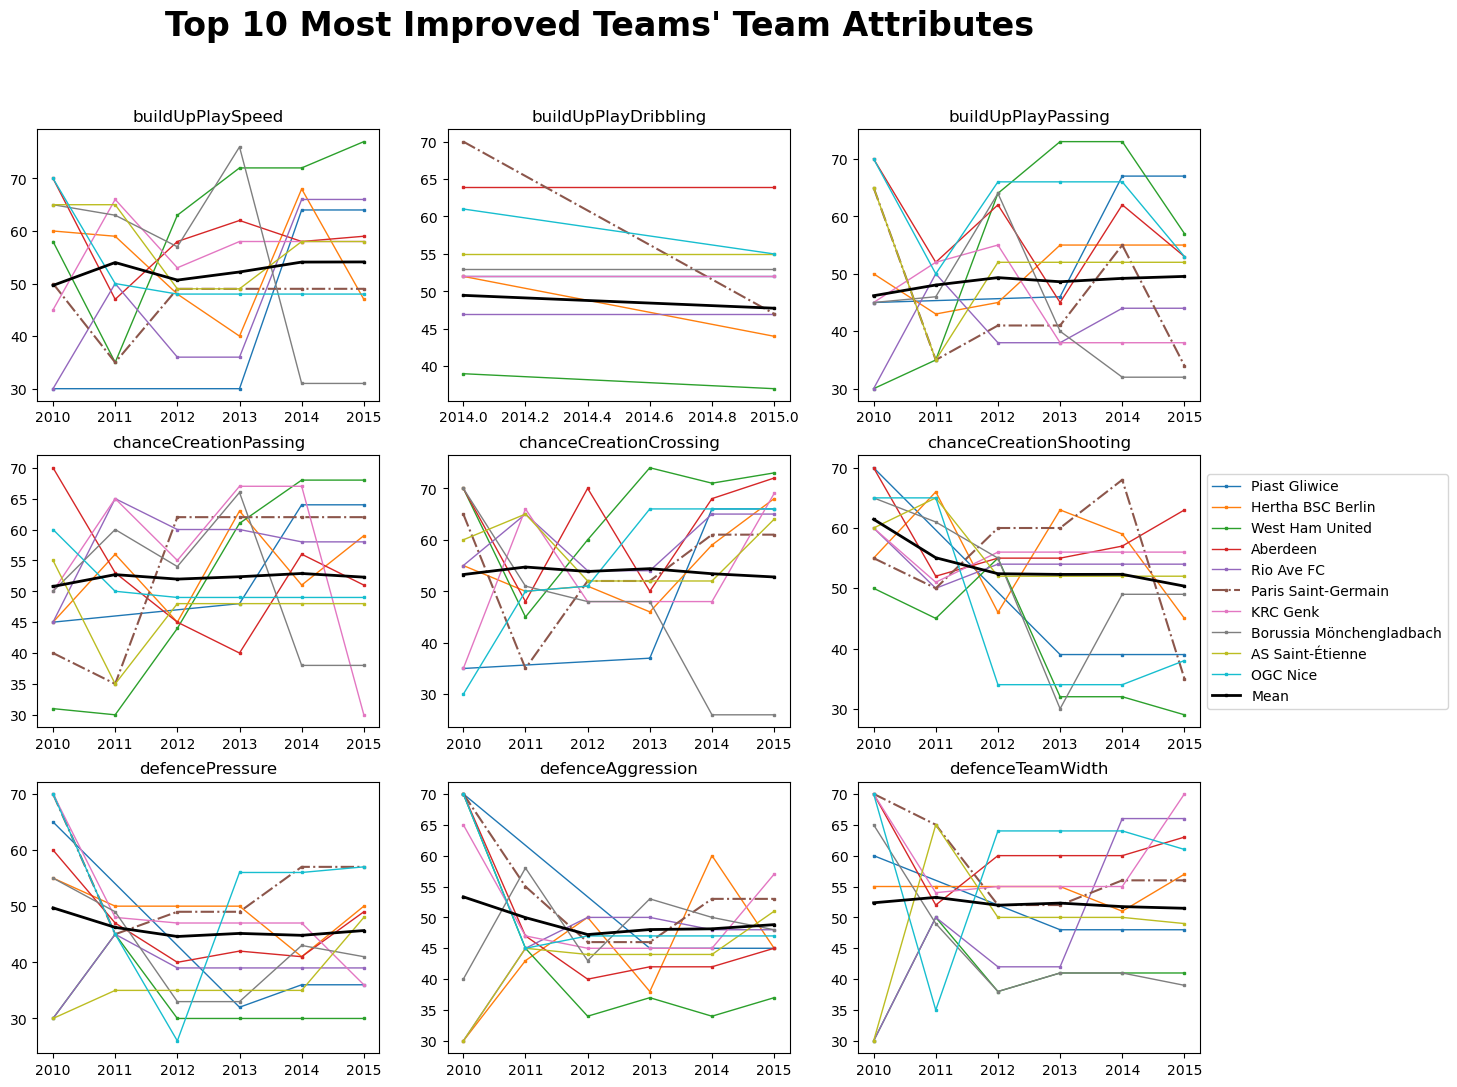

In [49]:
fig=plt.figure(num=None, figsize=(15, 12), facecolor='w', edgecolor='k')
fig.suptitle('Top 10 Most Improved Teams\' Team Attributes', fontsize=24, fontweight="bold")
tl=plt.subplot(331, title='buildUpPlaySpeed')
tm=plt.subplot(332, title='buildUpPlayDribbling')
tr=plt.subplot(333, title='buildUpPlayPassing')
ml=plt.subplot(334, title='chanceCreationPassing')
mm=plt.subplot(335, title='chanceCreationCrossing')
mr=plt.subplot(336, title='chanceCreationShooting')
bl=plt.subplot(337, title='defencePressure')
bm=plt.subplot(338, title='defenceAggression')
br=plt.subplot(339, title='defenceTeamWidth')
i=2 

for i, z in enumerate(Top5.team_long_name):  
    values=TA.query('team_long_name == "{}"'.format(z)).sort_values(by='date') 
    linesize = 1
    style = 'solid'
    if z in top15['team_long_name'].values:  #If the Most Improved team was a top 10 from 2015/2016, the linestyle is different.
        linesize = 1.5
        style='dashdot' #Below each Team's team attibute is plotted.
    tl.plot(values.date, values.buildUpPlaySpeed, label=z, linestyle = style, linewidth = linesize, marker='s', markersize=1.5)
    tm.plot(values.date, values.buildUpPlayDribbling, label=z, linestyle = style, linewidth = linesize, marker='s', markersize=1.5)
    tr.plot(values.date, values.buildUpPlayPassing, label=z, linestyle = style, linewidth = linesize, marker='s', markersize=1.5)
    ml.plot(values.date, values.chanceCreationPassing, label=z, linestyle = style, linewidth = linesize, marker='s', markersize=1.5)
    mm.plot(values.date, values.chanceCreationCrossing, label=z, linestyle = style, linewidth = linesize, marker='s', markersize=1.5)
    mr.plot(values.date, values.chanceCreationShooting, label=z, linestyle = style, linewidth = linesize, marker='s', markersize=1.5)
    bl.plot(values.date, values.defencePressure, label=z, linestyle = style, linewidth = linesize, marker='s', markersize=1.5)
    bm.plot(values.date, values.defenceAggression, label=z, linestyle = style, linewidth = linesize, marker='s', markersize=1.5)
    br.plot(values.date, values.defenceTeamWidth, label=z, linestyle = style, linewidth = linesize, marker='s', markersize=1.5)   
    i+=1
#Average Team attribute is plotted in Black.    
tl.plot(values.date, TA.groupby('date')['buildUpPlaySpeed'].mean(), color='black', linewidth=2, label="Mean", marker='s', markersize=1.5)
tm.plot(values.date, TA.groupby('date')['buildUpPlayDribbling'].mean(), color='black', linewidth=2, label="Mean", marker='s', markersize=1.5)
tr.plot(values.date, TA.groupby('date')['buildUpPlayPassing'].mean(), color='black', linewidth=2, label="Mean", marker='s', markersize=1.5)
ml.plot(values.date, TA.groupby('date')['chanceCreationPassing'].mean(), color='black', linewidth=2, label="Mean", marker='s', markersize=1.5)
mm.plot(values.date, TA.groupby('date')['chanceCreationCrossing'].mean(), color='black', linewidth=2, label="Mean", marker='s', markersize=1.5)
mr.plot(values.date, TA.groupby('date')['chanceCreationShooting'].mean(), color='black', linewidth=2, label="Mean", marker='s', markersize=1.5)
bl.plot(values.date, TA.groupby('date')['defencePressure'].mean(), color='black', linewidth=2, label="Mean", marker='s', markersize=1.5)
bm.plot(values.date, TA.groupby('date')['defenceAggression'].mean(), color='black', linewidth=2, label="Mean", marker='s', markersize=1.5)
br.plot(values.date, TA.groupby('date')['defenceTeamWidth'].mean(), color='black', linewidth=2, label="Mean", marker='s', markersize=1.5)
    

box=mr.get_position()
mr.set_position([box.x0, box.y0, box.width, box.height])

legend = mr.legend(loc='center left', bbox_to_anchor=(1, 0.5))
legend.set_title;

<font size="4" color="blue"> Paris Saint-Germain is a most improved team that landed top 10 for the 2015/2016 season.  We could review what changed for them to bring them into the top 10. Again, year's avagerage rank is plotted in black. </font>


Realizing it's hard to really compare what changed for each of the 3 groups, I created a new grid of plots comparing each Team Attribute for each Top 10 teams below. 

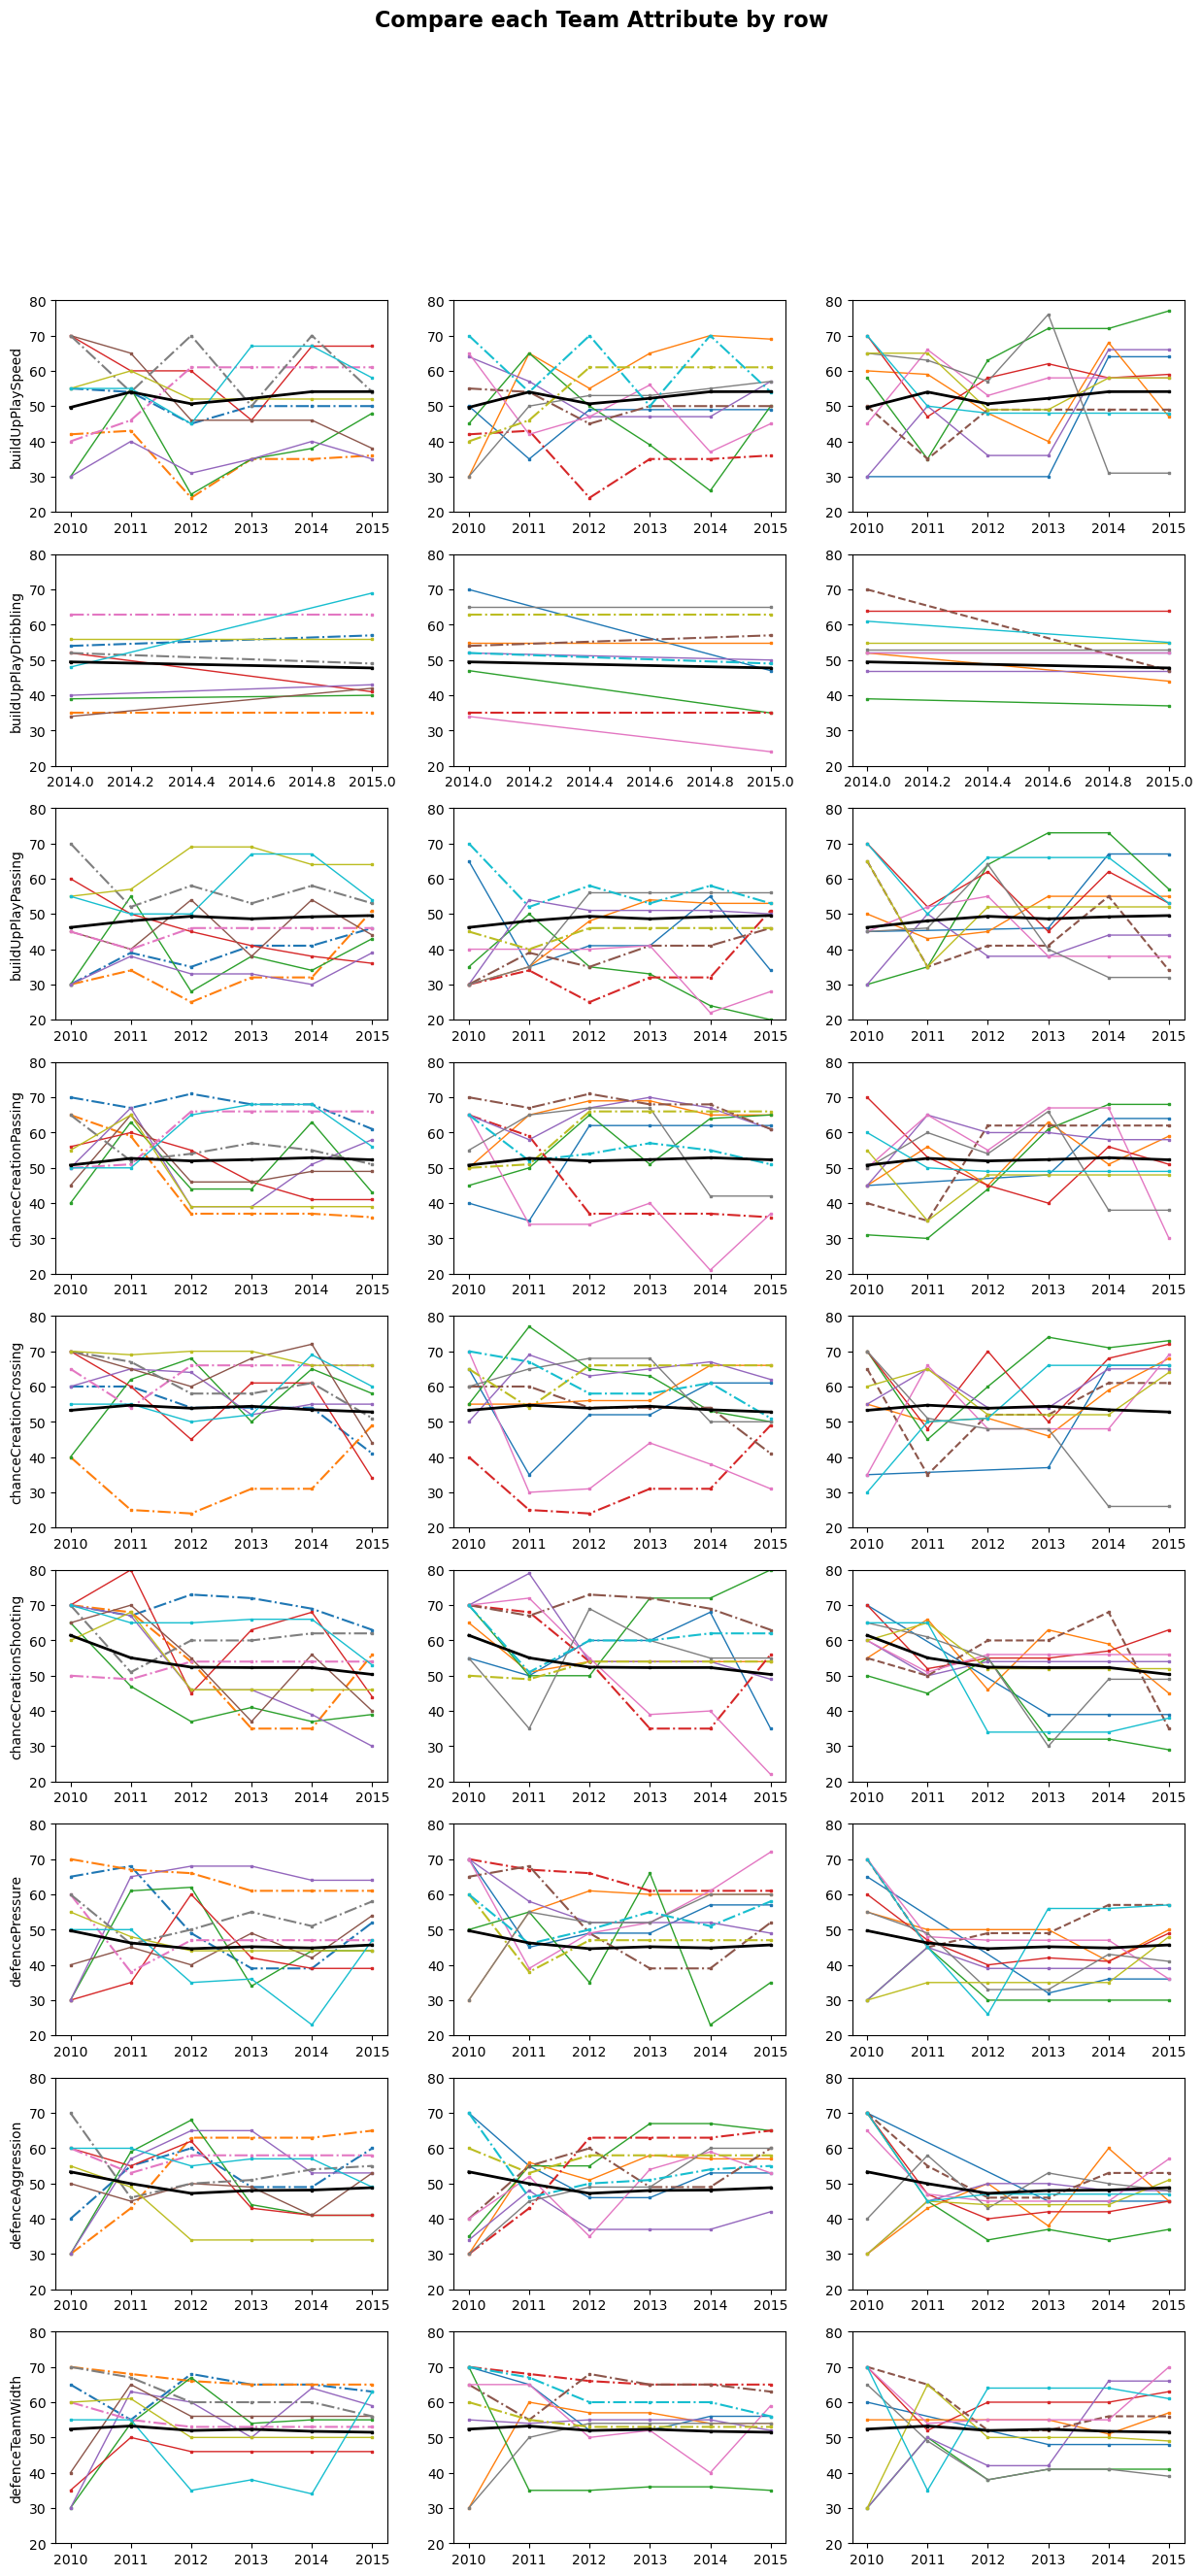

In [56]:
fig=plt.figure(num=None, figsize=(15, 30), facecolor='w', edgecolor='k')
fig.suptitle('Compare each Team Attribute by row', fontsize=16, fontweight="bold")
SubRows = 9
SubCols = 3


#2009/2010 Top Left Column
i = 2 #identifies the team attribute column being plotted
r = 1 #identifies the team row being plotted
p = 1 #identifies the graph number in the row, column, graph number.  2009/2010 teams are all in column 1 and incriments by 3
while r <= 9:   
    Lr = "L" + str(r)
    Lr = plt.subplot(SubRows,SubCols,p, ylim=(20, 80))
    for i, z in enumerate(top09.team_long_name):  
        values=TA.query('team_long_name == "{}"'.format(z)).sort_values(by='date') 
        linesize = 1
        style = 'solid'
        if z in top15['team_long_name'].values:
            linesize = 1.5
            style='dashdot'        
        Lr.plot(values.date, values.iloc[:,r+2], label=z, linestyle = style, linewidth = linesize, marker='s', markersize=1.5)
        i+=1
    Lr.plot(TA.groupby('date')[TA.columns[r+2]].mean(), color='black', linewidth=2, label="Mean", marker='s', markersize=1.5)
    Lr.set_ylabel(values.columns[r+2])
    p+=3
    r+=1

#2015/2016 Top 10 Center column
i = 2 #identifies the team attribute column being plotted
r = 1 #identifies the team row being plotted
p = 2 #identifies the graph number in the row, column, graph number.  2015/2016 teams are all in column 2 and incriments by 3

while r <= 9:
    Mr = "M" + str(r)
    Mr = plt.subplot(SubRows,SubCols,p, ylim=(20, 80))
    for i, z in enumerate(top15.team_long_name):  
        values=TA.query('team_long_name == "{}"'.format(z)).sort_values(by='date') 
        linesize = 1
        style = 'solid'
        if z in top09['team_long_name'].values:
            linesize = 1.5
            style='dashdot'        
        Mr.plot(values.date, values.iloc[:,r+2], label=z, linestyle = style, linewidth = linesize, marker='s', markersize=1.5)
        i+=1
    Mr.plot(TA.groupby('date')[TA.columns[r+2]].mean(), color='black', linewidth=2, label="Mean", marker='s', markersize=1.5)
    p+=3
    r+=1
    
#Most Improved Right column
i = 2 #identifies the team attribute column being plotted
r = 1 #identifies the team row being plotted
p = 3 #identifies the graph number in the row, column, graph number.  Most Improved teams are all in column 3 and incriments by 3

while r <= 9:
    Rr = "R" + str(r)
    Rr = plt.subplot(SubRows,SubCols,p, ylim=(20, 80))
    for i, z in enumerate(Top5.team_long_name):  
        values=TA.query('team_long_name == "{}"'.format(z)).sort_values(by='date') 
        linesize = 1
        style = 'solid'
        if z in top15['team_long_name'].values:
            linesize = 1.5
            style='dashed'        
        Rr.plot(values.date, values.iloc[:,r+2], label=z, linestyle = style, linewidth = linesize, marker='s', markersize=1.5)
        i+=1
    Rr.plot(TA.groupby('date')[TA.columns[r+2]].mean(), color='black', linewidth=2, label="Mean", marker='s', markersize=1.5)
    p+=3
    r+=1


<font size="4" color="blue"> Here it will be easier to compare each attribute across all the top 10 catagories. In general, the trend for the 2nd & 3rd columns should be opposite to column 1 to show what changed most.  </font>


# Conclusion

>`1.` Who are the top 10 teams of 2009/2010?

In [467]:
top09.team_long_name.tolist()

['Real Madrid CF',
 'FC Barcelona',
 'FC Twente',
 'Chelsea',
 'Ajax',
 'Manchester United',
 'FC Basel',
 'Celtic',
 'BSC Young Boys',
 'Inter']

> Are the top 10 teams for the 2009/2010 season.

>`2.` Who are the top 10 teams of 2015/2016?

In [468]:
top15.team_long_name.tolist()

['Paris Saint-Germain',
 'SL Benfica',
 'Juventus',
 'FC Barcelona',
 'Atlético Madrid',
 'Real Madrid CF',
 'FC Bayern Munich',
 'Sporting CP',
 'FC Basel',
 'Celtic']

>Are the top 10 teams for 2015/2016. 4 teams, Real Madrid CF, FC Barcelona, FC Basel, and Celtic maintained top 10 from the 2009/2010 season.

>`3.` Who are the 10 most improved teams from 2009/2010 to 2015/2016?

In [469]:
Top5.team_long_name.tolist()

['Piast Gliwice',
 'Hertha BSC Berlin',
 'West Ham United',
 'Aberdeen',
 'Rio Ave FC',
 'Paris Saint-Germain',
 'KRC Genk',
 'Borussia Mönchengladbach',
 'AS Saint-Étienne',
 'OGC Nice']

> Are the top 10 most improved teams from 2009/2010. Paris Saint-Germain improved enought to make it top 10 of the 2015/2016 Season. 



>`4.` Finally, I'll review the Team attributes for each group.

> Originally, I was hopeful I'd see trends from 2009/2010 to 2015/2016 Team Attributes going in opposite directions.  I was also hoping to see trends for 2015/2016 and Most Improved be similar.  Unfortunately, there doesn't look to be drastic trend differences to show individual Team Attributes that contributes to team wins. Each team really finds their strengths and plays upon them to create their own wins. 

A few points to make about the data points that influence the analysis:

`a.`	Some teams had no win/loss records for the 2009/2010 or the 2015/2016 seasons.  These teams were removed from the analysis. 

`b.`	While match information starts in 2008/2009 seasons, Team Attribute information didn’t begin until 2009/2010.  
Therefore, review of the 2008/2009 match seasons were removed. 

`c.`	Details regarding the meaning of the team attributes and how they were determined was not found. For example, for the Most Improved teams, a lower Defense Aggression score seems better than a higher score.  However, how this score is derived is not discussed.  It’s possible that the amount of defense aggression is lower in a later season than it was in an earlier season due to the improvement of the forward and midfielder’s abilities to maintain control of the ball.  By increasing the forwards’ and midfielders’ abilities to maintain control of the ball, this is lessening the amount of contact the defense would have with the ball.  In turn, is this lowering the defensive aggression needed simply by having less contact? It seems odd that a less aggressive defensive team would make for a better team.